In [1]:
!pip install pandas

In [2]:
import pandas as pd

In [3]:
covid_data = pd.read_csv('covid_19_clean_complete.csv')

In [4]:
covid_data.head(10)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0
5,NaN,Antigua and Barbuda,17.0608,-61.7964,1/22/20,0,0,0
6,NaN,Argentina,-38.4161,-63.6167,1/22/20,0,0,0
7,NaN,Armenia,40.0691,45.0382,1/22/20,0,0,0
8,Australian Capital Territory,Australia,-35.4735,149.0124,1/22/20,0,0,0
9,New South Wales,Australia,-33.8688,151.2093,1/22/20,0,0,0


In [5]:
!pip install matplotlib
!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sb

C:\Users\claud\miniconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\claud\miniconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


''

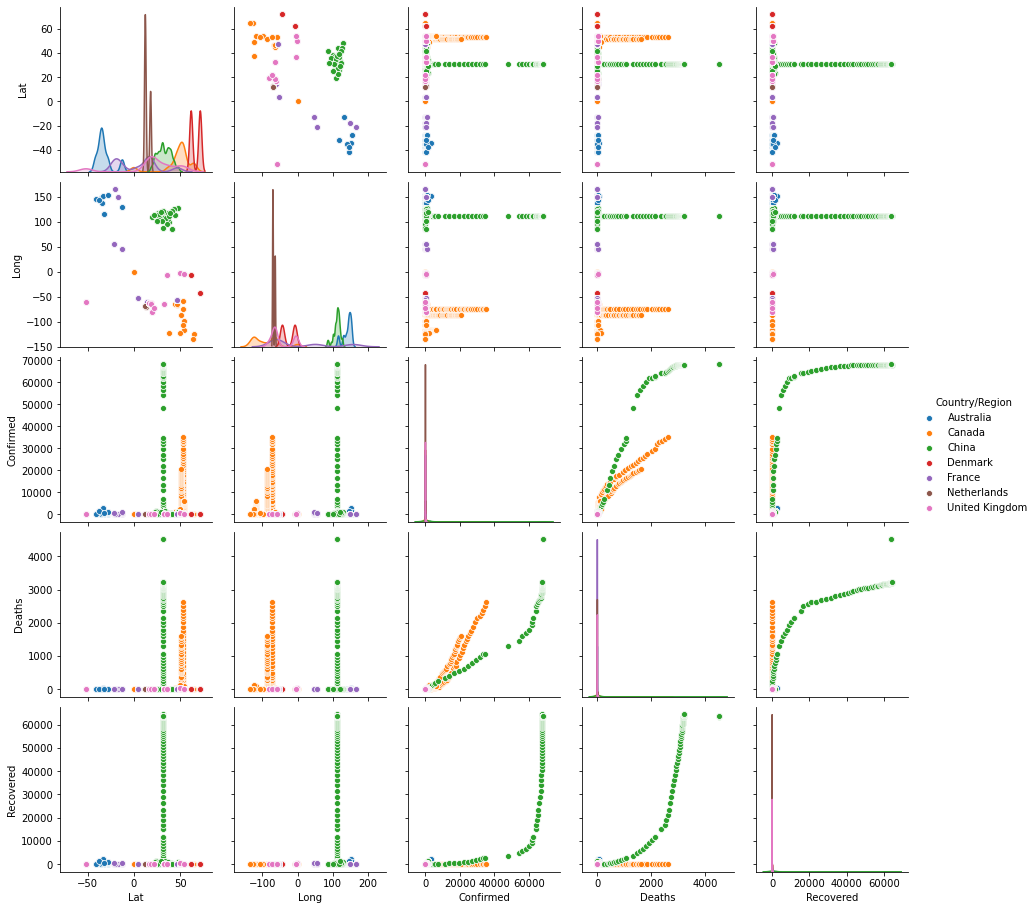

In [6]:
sb.pairplot(covid_data.dropna(), hue='Country/Region')
;

In [7]:
covid_data.drop(['Province/State', 'Lat', 'Long'],axis=1, inplace=True)
covid_data['Date'] = pd.to_datetime(covid_data['Date'])

In [8]:
covid_data.head(10)

,Country/Region,Date,Confirmed,Deaths,Recovered
0,Afghanistan,2020-01-22,0,0,0
1,Albania,2020-01-22,0,0,0
2,Algeria,2020-01-22,0,0,0
3,Andorra,2020-01-22,0,0,0
4,Angola,2020-01-22,0,0,0
5,Antigua and Barbuda,2020-01-22,0,0,0
6,Argentina,2020-01-22,0,0,0
7,Armenia,2020-01-22,0,0,0
8,Australia,2020-01-22,0,0,0
9,Australia,2020-01-22,0,0,0


In [9]:
#aggregates de countries by date
covid_data = covid_data.groupby(['Country/Region', 'Date'])[['Confirmed', 'Deaths', 'Recovered']].apply(sum)

#eliminates rows with no suspected, no deaths and no cured
covid_data = covid_data[(covid_data.T != 0).any()] 

#get group by columns back
covid_data.reset_index(inplace=True) 

#substructs the mim date from the current date (and returns the result in days - dt.days)
covid_data['Ellapsed Days'] = (covid_data['Date'] - covid_data.groupby('Country/Region')['Date'].transform('min')).dt.days

In [10]:
covid_data.head(10)

,Country/Region,Date,Confirmed,Deaths,Recovered,Ellapsed Days
0,Afghanistan,2020-02-24,1,0,0,0
1,Afghanistan,2020-02-25,1,0,0,1
2,Afghanistan,2020-02-26,1,0,0,2
3,Afghanistan,2020-02-27,1,0,0,3
4,Afghanistan,2020-02-28,1,0,0,4
5,Afghanistan,2020-02-29,1,0,0,5
6,Afghanistan,2020-03-01,1,0,0,6
7,Afghanistan,2020-03-02,1,0,0,7
8,Afghanistan,2020-03-03,1,0,0,8
9,Afghanistan,2020-03-04,1,0,0,9


In [11]:
covid_data.to_csv('covid_data_clean.csv')

In [12]:
countries_data = pd.read_csv('countries of the world.csv')

In [13]:
#removing trailing white spaces
countries_data_country = countries_data['Country'].str.strip()

#replacing & for and
countries_data_country.replace({'&': 'and'}, inplace=True, regex=True)

#particular cases
countries_data_country.replace({'Taiwan': 'Taiwan*'}, inplace=True, regex=True)
countries_data_country.replace({'Macedonia': 'North Macedonia'}, inplace=True, regex=True)
countries_data_country.replace({'Korea, South': 'South Korea'}, inplace=True, regex=True)
countries_data_country.replace({'United States': 'US'}, inplace=True, regex=True)
countries_data_country.replace({'Gambia, The': 'Gambia'}, inplace=True, regex=True)
countries_data_country.replace({'American Samoa': 'Samoa'}, inplace=True, regex=True)
countries_data_country.replace({'Czech Republic': 'Czechia'}, inplace=True, regex=True)
countries_data_country.replace({'Swaziland': 'Eswatini'}, inplace=True, regex=True)
countries_data_country.replace({'East Timor': 'Timor-Leste'}, inplace=True, regex=True)
countries_data_country.replace({'Bahamas, The': 'Bahamas'}, inplace=True, regex=True)
countries_data_country.replace({'Cape Verde': 'Cabo Verde'}, inplace=True, regex=True)
countries_data_country.replace({'Central African Rep.': 'Central African Republic'}, inplace=True, regex=True)
countries_data_country.replace({'Congo, Dem. Rep.': 'Congo (Kinshasa)'}, inplace=True, regex=True)
countries_data_country.replace({'Congo, Repub. of the': 'Congo (Brazzaville)'}, inplace=True, regex=True)

In [14]:
#get countries present in covid data and removing trailing white spaces
covid_data_country_unique = covid_data['Country/Region'].drop_duplicates().str.strip()

#get series with all the countries present in both data sets
df = pd.concat([covid_data_country_unique,countries_data_country])

#drop values that are repeated (keep the unique values)
unique_values = df.drop_duplicates(keep=False)

#sort them for an easy read
unique_values = unique_values.sort_values()

In [15]:
pd.set_option('display.max_rows', unique_values.shape[0]+1)
print(unique_values)

6                      Anguilla
10                        Aruba
22                      Bermuda
28           British Virgin Is.
38               Cayman Islands
47                 Cook Islands
3043           Diamond Princess
66                Faroe Islands
70                French Guiana
71             French Polynesia
74                   Gaza Strip
78                    Gibraltar
80                    Greenland
82                   Guadeloupe
83                         Guam
85                     Guernsey
4757                   Holy See
91                    Hong Kong
99                  Isle of Man
104                      Jersey
108                    Kiribati
109                Korea, North
5919                     Kosovo
116                     Lesotho
6578                 MS Zaandam
122                       Macau
130            Marshall Islands
131                  Martinique
134                     Mayotte
136        Micronesia, Fed. St.
7340                 Montenegro
140     

In [16]:
#replacing the column with the country names with the revised column
old_df = pd.DataFrame(countries_data)
reviwed_df = pd.DataFrame(countries_data_country)
new_df = old_df.assign(Country=reviwed_df['Country'])

#saving it to a file
new_df.to_csv('countries_data_clean.csv')